In [1]:
import os
import shutil
from PIL import Image
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_ = "data"
market_path_train = "/Market-1501-v15.09.15/bounding_box_train"
market_path_test = "/Market-1501-v15.09.15/bounding_box_test"
dist_market_path_train = "/train"
dist_market_path_test = "/test"
files_train = os.listdir(dir_ + market_path_train)
files_test = os.listdir(dir_ + market_path_test)

In [3]:
im = Image.open(dir_ + dist_market_path_train + '/' + '0002' + '/' + '0002_c1s1_000451_03.jpg')

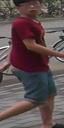

In [4]:
im

In [5]:
im_np = np.array(im)

In [7]:
h = len(im_np)
w = len(im_np[0])
v = len(im_np[0][0])
print("Size h = {}, w = {}, v = {}".format(h, w, v))

Size h = 128, w = 64, v = 3


In [12]:
#inplace = 3 - кол-во входных каналов (RGB)

class CNN_ReID(nn.Module):
    def __init__(self, inplanes=3, planes1=8, planes2=16, planes3=32, stride=1):
        super(CNN_ReID, self).__init__()

        self.layer1 = nn.Sequential(nn.Conv2d(inplanes, planes1, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential(nn.Conv2d(planes1, planes2, kernel_size=3, stride=1, padding=1), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(planes2, planes3, kernel_size=3, stride=1, padding=1), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        #self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(16 * 8 * planes3, 750) # 16*8*32 = 4096
        def forward(self, x): 
            out = self.layer1(x) 
            out = self.layer2(out)
            out = self.layer3(out)
            out = out.reshape(out.size(0), -1)
            #out = self.drop_out(out)
            out = self.fc1(out)
            return out

In [13]:
learning_rate = 0.001

In [14]:
model = CNN_ReID()
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss() объединяет и SoftMax, и кросс-энтропийную функцию потерь
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [15]:
total_step = len(train_loader)
loss_list = []
acc_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Прямой запуск
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Отслеживание точности
        #total = labels.size(0)
        #_, predicted = torch.max(outputs.data, 1)
        #correct = (predicted == labels).sum().item()
        #acc_list.append(correct / total)

        #if (i + 1) % 100 == 0:
        #    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        #          .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
        #                  (correct / total) * 100))

NameError: name 'train_loader' is not defined

## TODO: read Market-1501